In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

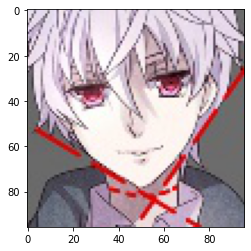

In [ ]:
from matplotlib.image import imread
male = ('/content/drive/MyDrive/Training/boy'+'/动漫男 (1).jpg')

plt.imshow(imread(male))
plt.show()

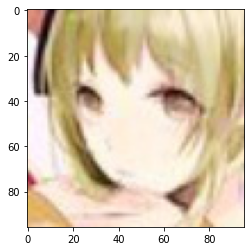

In [ ]:
female = ('/content/drive/MyDrive/Training/girl'+'/42c98f15fccca13ac64cc9815cfbd62e-0.jpg')

plt.imshow(imread(female))
plt.show()

In [ ]:
image_shape = (96,96,3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              rescale=1/255)
image_gen.flow_from_directory('/content/drive/MyDrive/Training')
image_gen.flow_from_directory('/content/drive/MyDrive/Validation')

Found 2244 images belonging to 2 classes.
Found 392 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        9

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
batch_size = 32
train_image_gen = image_gen.flow_from_directory('/content/drive/MyDrive/Training',
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')
val_image_gen = image_gen.flow_from_directory('/content/drive/MyDrive/Validation',
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2244 images belonging to 2 classes.
Found 392 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'boy': 0, 'girl': 1}

In [19]:
GPU = True
results = model.fit_generator(train_image_gen,epochs=30,
                              validation_data=val_image_gen,)
                             #callbacks=[early_stop])

Epoch 1/30
71/71 [==============================] - 9s 131ms/step - loss: 0.6357 - accuracy: 0.6377 - val_loss: 0.6351 - val_accuracy: 0.8214
Epoch 2/30
71/71 [==============================] - 9s 130ms/step - loss: 0.6197 - accuracy: 0.6591 - val_loss: 0.5805 - val_accuracy: 0.8214
Epoch 3/30
71/71 [==============================] - 9s 131ms/step - loss: 0.5845 - accuracy: 0.6898 - val_loss: 0.4976 - val_accuracy: 0.8010
Epoch 4/30
71/71 [==============================] - 9s 131ms/step - loss: 0.5658 - accuracy: 0.7152 - val_loss: 0.5411 - val_accuracy: 0.7296
Epoch 5/30
71/71 [==============================] - 9s 129ms/step - loss: 0.5377 - accuracy: 0.7255 - val_loss: 0.5019 - val_accuracy: 0.7628
Epoch 6/30
71/71 [==============================] - 9s 129ms/step - loss: 0.5231 - accuracy: 0.7415 - val_loss: 0.4564 - val_accuracy: 0.8291
Epoch 7/30
71/71 [==============================] - 9s 131ms/step - loss: 0.4935 - accuracy: 0.7767 - val_loss: 0.4212 - val_accuracy: 0.8469
Epoch 

In [20]:
from tensorflow.keras.models import load_model
model.save('Gender.h5')

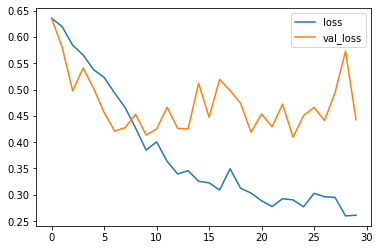

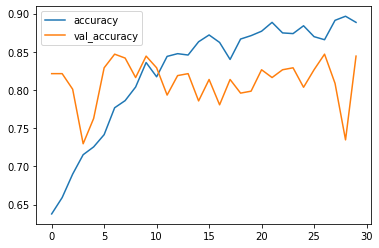

In [21]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()
plt.show()
metrics[['accuracy','val_accuracy']].plot()
plt.show()

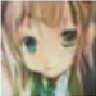

In [ ]:
from tensorflow.keras.preprocessing import image
img = '/content/f2.jpg'

my_image = image.load_img(img,target_size=image_shape)

my_image

In [ ]:
my_image = image.img_to_array(my_image)
type(my_image)

numpy.ndarray

In [ ]:
my_image1 = np.expand_dims(my_image, axis=0)

In [ ]:
model.predict(my_image1)

array([[1.]], dtype=float32)

In [ ]:
print(Gender)

1


In [ ]:
if (Gender == 1):
  print("girl")
else:
  print("boy")

girl


In [ ]:
import cv2
import numpy as np

img1 = cv2.imread('/content/f2.jpg')
img_using1 = cv2.imread('/content/兮喵工坊 (78).png')
img_using2 = cv2.imread('/content/兮喵工坊 (52).png')
img_using2 = cv2.resize(img_using2,(51,51))

#img1.shape
#img_using1.shape
final_figure = cv2.addWeighted(img1,1,img_using2,1,1)
img2 = np.asarray(img_using2).astype(float)
img3 = np.asarray(final_figure).astype(float)
cv2.imwrite('/content/final/1.png',img3)




error: ignored

In [ ]:
img1.shape

(75, 75, 3)

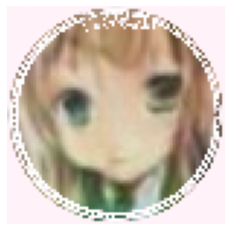

In [ ]:
import cv2  
import numpy as np 

img1 = cv2.imread('/content/f2.jpg')
img2 = cv2.imread('/content/兮喵工坊 (52).png')
img2 = cv2.resize(img2,(75,75))
img3 = cv2.imread('/content/兮喵工坊 (90).png')
img3 = cv2.resize(img3,(75,75))

if Gender == 1:
  rows,cols,channels = img2.shape
  roi  = img1[0:rows,0:cols ]

  img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
  ret,mask =cv2.threshold(img2gray,200,255,cv2.THRESH_BINARY)
  mask_inv = cv2.bitwise_not(mask)

  img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
  img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

  dst = cv2.add(img1_bg,img2_fg)
  img1[0:rows,0:cols] = dst

  cv2.imwrite('/content/final/1.png',img1)
else:
  rows,cols,channels = img3.shape
  roi  = img1[0:rows,0:cols ]

  img3gray = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
  ret,mask =cv2.threshold(img3gray,200,255,cv2.THRESH_BINARY)
  mask_inv = cv2.bitwise_not(mask)

  img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
  img3_fg = cv2.bitwise_and(img3,img3,mask = mask)

  dst = cv2.add(img1_bg,img3_fg)
  img1[0:rows,0:cols] = dst

  cv2.imwrite('/content/final/1.png',img1)

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np

img_1 = mpimg.imread('/content/final/1.png')

plt.imshow(img_1)
plt.axis('off')
plt.show()

In [ ]:
img1 = cv2.imread('/content/1.jpg')
img1.shape

(48, 48, 3)